This notebook explains the steps to develop an Automated Supervised Machine Learning Regression program, which automatically tunes the hyperparameters and prints out the final accuracy results as a tables together with feature importance results.

Let's import all libraries.

In [1]:
import pandas as pd
import numpy as np

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_absolute_percentage_error

from itertools import repeat
import matplotlib.pyplot as plt

Lets import our dataset from the csv files as a dataframe.

In [2]:
df = pd.read_csv('data.csv')  

Let's take a look at dataset. I like using df.describe() function to have some statistics about each column.

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,27.0,12.438889,0.181518,12.050000,12.350000,12.400000,12.525000,12.800000
B,27.0,13.240741,1.476550,11.500000,12.000000,13.000000,14.250000,17.000000
C,27.0,722.518519,124.861884,496.000000,632.500000,720.000000,832.000000,885.000000
D,27.0,19.259259,1.631248,16.000000,18.000000,19.000000,20.000000,23.000000
E,27.0,12.296296,2.267069,9.000000,11.000000,12.000000,14.000000,18.000000
F,27.0,68.832028,13.160644,40.321912,59.554258,66.549069,81.377992,92.415572


Let's define the features as X and the column we want to predict (column F) as y. 

In [4]:
n = len(df.columns)
X = df.iloc[:,0:n-1].to_numpy() 
y = df.iloc[:,n-1].to_numpy()

This defines X as all the values except the last column (columns A,B,C,D,E), and y as the last column (column numbers start from zero, hence: 0 - A, 1 - B, 2 - C, 3 - D,4 - E, 5 -F).

Some algorithms provide better accuracies with the standard scaling of the input features (i.e. normalization). Let's normalize the data. 

In [5]:
scaler = StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

We have to split our dataset as train and test data. For this we can use train_test_split by sklearn.model_selection. Test size of 0.20 means that 20% of the data will be used as test data and 80% of the data will be used for training.

In [6]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.20)

We might not always want to tune the parameters of models, or only tune for some models. For this I have defined a basic input. When it is set to "True", the program will perform the tuning for all the models.

In [7]:
Perform_tuning = True
Lassotuning, Ridgetuning, randomforestparametertuning, XGboostparametertuning, SVMparametertuning, MLPparametertuning = repeat(Perform_tuning,6)

Let's define the grid search function to be used with our models. The values of grid might need to be changed regarding the problem (i.e., some problems might require higher values of n_estimators, while some might require lower ranges).

In [8]:
def grid_search(model,grid):
    # Instantiate the grid search model
    print ("Performing gridsearch for {}".format(model))
    grid_search = GridSearchCV(estimator = model(), param_grid=grid, 
                              cv = 3, n_jobs = -1, verbose = 2)
    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)
    print("Grid Search Best Parameters for {}".format(model))
    print (grid_search.best_params_)
    return grid_search.best_params_

Performing Lasso parameter tuning.

In [9]:
if Lassotuning:
    # Create the parameter grid based on the results of random search 
    grid = {
        'alpha': [1,0.9,0.75,0.5,0.1,0.01,0.001,0.0001] , 
        "fit_intercept": [True, False]
    }
    Lasso_bestparam = grid_search(Lasso,grid) 

Performing gridsearch for <class 'sklearn.linear_model._coordinate_descent.Lasso'>
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Grid Search Best Parameters for <class 'sklearn.linear_model._coordinate_descent.Lasso'>
{'alpha': 0.1, 'fit_intercept': True}


Performing Ridge parameter tuning.

In [10]:
if Ridgetuning:
    # Create the parameter grid based on the results of random search 
    grid = {
        'alpha': [1,0.9,0.75,0.5,0.1,0.01,0.001,0.0001] , 
        "fit_intercept": [True, False]
    }
    Ridge_bestparam = grid_search(Ridge,grid) 

Performing gridsearch for <class 'sklearn.linear_model._ridge.Ridge'>
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Grid Search Best Parameters for <class 'sklearn.linear_model._ridge.Ridge'>
{'alpha': 0.5, 'fit_intercept': True}


Performing Random Forest parameter tuning.

In [11]:
if randomforestparametertuning:
    # Create the parameter grid based on the results of random search 
    grid = {
        'bootstrap': [True,False],
        'max_depth': [40, 50, 60, 70],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1,2,3,],
        'min_samples_split': [3, 4, 5,6,7],
        'n_estimators': [5,10,15]
        }
    RF_bestparam = grid_search(RandomForestRegressor,grid) 

Performing gridsearch for <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Grid Search Best Parameters for <class 'sklearn.ensemble._forest.RandomForestRegressor'>
{'bootstrap': True, 'max_depth': 60, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 15}


Performing XGBoost parameter tuning.

In [12]:
if XGboostparametertuning:
    # Create the parameter grid based on the results of random search 
    grid = {'colsample_bytree': [0.9,0.7],
                    'gamma': [2,5],
                    'learning_rate': [0.1,0.2,0.3],
                    'max_depth': [8,10,12],
                    'n_estimators': [5,10],
                    'subsample': [0.8,1],
                    'reg_alpha': [15,20],
                    'min_child_weight':[3,5]}
    XGB_bestparam = grid_search(XGBRegressor,grid) 

Performing gridsearch for <class 'xgboost.sklearn.XGBRegressor'>
Fitting 3 folds for each of 576 candidates, totalling 1728 fits
Grid Search Best Parameters for <class 'xgboost.sklearn.XGBRegressor'>
{'colsample_bytree': 0.9, 'gamma': 5, 'learning_rate': 0.3, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 10, 'reg_alpha': 15, 'subsample': 0.8}


Performing SVM parameter tuning.

In [13]:
#SVM Parameter Tuning----------------------------------------------------------
if SVMparametertuning:
    grid = {'gamma': 10. ** np.arange(-5, 3),
            'C': 10. ** np.arange(-3, 3)}
    SVR_bestparam = grid_search(SVR,grid)

Performing gridsearch for <class 'sklearn.svm._classes.SVR'>
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Grid Search Best Parameters for <class 'sklearn.svm._classes.SVR'>
{'C': 100.0, 'gamma': 0.01}


Performing MLP parameter tuning.

In [14]:
if MLPparametertuning:
    grid = {
        'hidden_layer_sizes': [2,5,8,10],
        'activation': ['identity','logistic','tanh','relu'],
        'solver': ['lbfgs', 'sgd','adam'],
        'learning_rate': ['constant','invscaling','adaptive']}
    MLP_bestparam = grid_search(MLPRegressor,grid)   

Performing gridsearch for <class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
Fitting 3 folds for each of 144 candidates, totalling 432 fits
Grid Search Best Parameters for <class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
{'activation': 'relu', 'hidden_layer_sizes': 8, 'learning_rate': 'constant', 'solver': 'lbfgs'}


Now we obtained the best parameters for all the models using the training data. Let's define the error metrics that will be used in analyzing the accuracy of each model. 

In [15]:
error_metrics = (
    explained_variance_score,
    max_error,
    mean_absolute_error,
    mean_squared_error,
    mean_squared_log_error,
    median_absolute_error,
    r2_score,
    mean_poisson_deviance,
    mean_gamma_deviance,
    mean_absolute_percentage_error        
)

Let's define fit_model function to predict the results, and analyze the error metrics for each model.

In [16]:
def fit_model(model,X_train, X_test, y_train, y_test,error_metrics):
    fitted_model = model.fit(X_train,y_train)
    y_predicted = fitted_model.predict(X_test)
    calculations = []
    for metric in error_metrics:
        calc = metric(y_test, y_predicted)
        calculations.append(calc)
    return calculations

Provide a summary of each model and their GridSearch best parameter results. If tuning is not performed, the script will use the default values as best parameters. 

In [17]:
try:
    trainingmodels = (
        LinearRegression(), 
        Ridge(**Ridge_bestparam), 
        RandomForestRegressor(**RF_bestparam), 
        XGBRegressor(**XGB_bestparam), 
        Lasso(**Lasso_bestparam),
        SVR(**SVR_bestparam),
        MLPRegressor(**MLP_bestparam)
    )
    
except:
    trainingmodels = (
        LinearRegression(), 
        Ridge(), 
        RandomForestRegressor(), 
        XGBRegressor(), 
        Lasso(),
        SVR(),
        MLPRegressor()
    )    

calculations = []

Below loop performes training, testing and error metrics calculations for each model. 

In [18]:
for trainmodel in trainingmodels:
    errors = fit_model(trainmodel,X_train, X_test, y_train, y_test,error_metrics)
    calculations.append(errors)

Let's organize these results, and summarize them all in a dataframe. 

In [19]:
errors = (
    'Explained variance score',
    'Max error',
    'Mean  absolute error',
    'Mean squared error',
    'Mean squared log error',
    'Median absolute error',
    'r2 score',
    'Mean poisson deviance',
    'Mean gamma deviance',
    'Mean absolute percentage error'        
)

model_names = (
    'LinearRegression', 
    'Ridge', 
    'RandomForestRegressor', 
    'XGBRegressor', 
    'Lasso',
    'SVR',
    'MLPRegressor'
)

df_error = pd.DataFrame(calculations, columns=errors)
df_error["Model"] = model_names

cols = df_error.columns.tolist() 
cols = cols[-1:] + cols[:-1]
df_error = df_error[cols]
df_error = df_error.sort_values(by=['Mean squared error'],ascending=True)
df_error = (df_error.set_index('Model')
        .astype(float)
        .applymap('{:,.3f}'.format))
df_error.to_csv("errors.csv")
df_error

,Explained variance score,Max error,Mean absolute error,Mean squared error,Mean squared log error,Median absolute error,r2 score,Mean poisson deviance,Mean gamma deviance,Mean absolute percentage error
Model,,,,,,,,,,
LinearRegression,0.998,0.647,0.314,0.143,0.000,0.255,0.998,0.002,0.000,0.005
Lasso,0.999,0.744,0.327,0.145,0.000,0.291,0.998,0.002,0.000,0.005
Ridge,0.997,0.731,0.412,0.243,0.000,0.520,0.997,0.004,0.000,0.007
SVR,0.995,1.180,0.497,0.479,0.000,0.207,0.994,0.008,0.000,0.008
MLPRegressor,0.931,5.460,1.771,6.871,0.002,0.803,0.911,0.112,0.002,0.030
RandomForestRegressor,0.875,5.233,2.555,9.634,0.002,2.735,0.875,0.149,0.002,0.040
XGBRegressor,0.939,7.474,4.334,23.491,0.005,3.405,0.696,0.363,0.006,0.066


Moreover, we can analyze the feature importance results using the Random Forest regressor. 

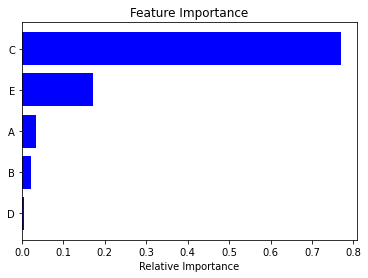

In [20]:
#Principal Component Analysis
features = df.columns[:-1]
try:
    randreg = RandomForestRegressor(**RF_bestparam).fit(X,y)
except:
    randreg = RandomForestRegressor().fit(X,y)    
importances = randreg.feature_importances_
indices = np.argsort(importances)
plt.figure(3) #the axis number
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.savefig('Feature Importance.png', 
              bbox_inches='tight', dpi = 500)